# ДЗ Линейная регрессия

В данном задании мы рассмотрим набор данных об учащихся, собранный в 2006 году в одной из школ Португалии. Данные представлены в неудобном для машинного обучения виде, и содержат мусор. Ваша задача &mdash; привести их к надлежащему виду и обучить на них простую модель.

Данные состоят из четырех файлов:
- data.csv &mdash; основная таблица с информацией о учащихся
- scores.csv &mdash; список финальных оценок по одному из предметов (20-балльная шкала переведенная в проценты)
- attendance.csv &mdash; таблица посещений занятий по этому предмету
- school_support.txt &mdash; список учащихся, которым оказывается финансовая поддержка

Ваша задача &mdash; построить модель для предсказания финальных оценок исходя из всех остальных данных и проверить качество ее работы с помощью кросс-валидации. В качестве алгоритма мы будем использовать линейную регрессию

Расшифровка столбцов в data.csv для справки:
- age &mdash; возраст
- Medu &mdash; уровень образования матери (по некоторой условной шкале)
- Fedu &mdash; уровень образования отца (по некоторой условной шкале)
- traveltime &mdash; время в пути до школы (1 – < 15 мин., 2 – от 15 до 30 мин., 3 – от 30 мин. to 1 ч.
или 4 – > 1 ч.)
- studytime &mdash; время, затрачиваемое на занятия вне школы (1 – < 2 ч., 2 – от 2 до 5 ч., 3 – от 5 до 10 ч. или 4 – > 10 ч.)
- famrel &mdash; насколько хорошие отношения в семье у учащегося (по некоторой условной шкале)
- freetime &mdash; количество свободного времени вне школы (по некоторой условной шкале)
- goout &mdash; время, затрачиваемое на общение с друзьями (по некоторой условной шкале)
- Dalc &mdash; количество употребления алкоголя в учебные дни (по некоторой условной шкале)
- Walc &mdash; количество употребления алкоголя в неучебные дни (по некоторой условной шкале)
- health &mdash; уровень здоровья (по некоторой условной шкале)
- sex_M &mdash; пол: мужской (1) или женский (0)
- address_U &mdash; живет ли учащийся в городе (1) или в пригороде (0)
- famsize_LE3 &mdash; размер семьи: не больше 3 человек (1) или больше (0)
- Pstatus_T &mdash; живут ли родители вместе (1) или отдельно (0)
- nursery &mdash; посещал ли учащийся детский сад
- plans_university &mdash; планирует ли учащийся поступать в университет (-1 или 1)
- past_failures &mdash; количество неудовлетворительных оценок по другим предметам ранее (от 0 до 4)

*Примечание. Несколько признаков в данных содержат ошибки/проблемы/некорректности. Эти проблемы нужно исправить. Для
проверки &mdash; всего в данных таких проблем четыре.*

### Задача 1: сломанный признак (а может и не один)
__(1 балл)__

Загрузите таблицу data.csv.

Найдите в данных сломанный признак (он не соответствует описанию) и исправьте его.

In [1]:
import pandas
import numpy as np

data = pandas.read_csv('data.csv', delimiter=',')
data.describe()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_universitypast_failures
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,648.000000,639.000000,643.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,50.164869,2.514638,2.306626,1.747304,1.930663,3.930663,3.180277,3.186728,1.497653,2.286159,3.536210,0.409861,0.696456,0.295840,0.876733,0.802773,7.935285
std,254.768848,1.134552,1.099931,2.716138,0.829510,0.955717,1.051093,1.175751,0.924879,1.285764,1.446259,0.492187,0.460143,0.456771,0.328996,0.398212,6.475653
min,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-13.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,10.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000
max,1991.000000,4.000000,4.000000,50.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000


In [2]:
# 1. Признаки plans_university и past_failures склеены.
# 2. Признак age не все указывали корректно.
# 3. Признак traveltime не все указывали корректно.
# 4. Признаки goout, Dalc и Walc не всегда указывали (NaN).

In [3]:
# 1. Разделим признаки.
data = data.rename(columns={"plans_universitypast_failures": "plans_university"})
data['past_failures'] = abs(data['plans_university']) % 10
data['plans_university'] = np.array([int(str(int(i))[:-1]) for i in data['plans_university']])
data.head

# 2. В age иногда указан год, посчитаем возраст с учетом того, что год 2006.
data['age'] = np.array([(i if i < 200 else 2006 - i) for i in data['age']])

# 3. В travel иногда указано само время, а не число от 0 до 4, соответствующее признаку.
# 1 – < 15 мин., 2 – от 15 до 30 мин., 3 – от 30 мин. to 1 ч. или 4 – > 1 ч.


def get_c(t):
    if t < 15:
        return 1
    if t < 30:
        return 2
    if t < 60:
        return 3
    return 4


data['traveltime'] = np.array([(i if i <= 4 else get_c(i)) for i in data['traveltime']])

data.describe()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,648.000000,639.000000,643.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,3.930663,3.180277,3.186728,1.497653,2.286159,3.536210,0.409861,0.696456,0.295840,0.876733,0.802773,0.787365,0.221880
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.955717,1.051093,1.175751,0.924879,1.285764,1.446259,0.492187,0.460143,0.456771,0.328996,0.398212,0.616962,0.593235
min,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


### Задача 2: пропуски в данных 
__(1 балл)__

Проверьте, есть ли в данных пропуски (значения NaN). Замените все пропущенные значения на среднее значение этого признака по столбцу.

__(+1 балл)__

Дополнительно сравните качество замены на среднее по столбцу и на медиану по столбцу


*Hint: изучите в pandas функции loc, isnull, а также передачу булевых массивов в качестве индексов.*

In [4]:
# 4. Средние.
for c in data.columns:
    data[c] = data[c].fillna(data[c].mean())
data.describe()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,3.930663,3.180277,3.186728,1.497653,2.286159,3.536210,0.409861,0.696456,0.295840,0.876733,0.802773,0.787365,0.221880
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.955717,1.051093,1.174843,0.917715,1.279797,1.446259,0.492187,0.460143,0.456771,0.328996,0.398212,0.616962,0.593235
min,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
# 4. Медиана.
for c in data.columns:
    data[c] = data[c].fillna(data[c].median())
data.describe()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,3.930663,3.180277,3.186728,1.497653,2.286159,3.536210,0.409861,0.696456,0.295840,0.876733,0.802773,0.787365,0.221880
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.955717,1.051093,1.174843,0.917715,1.279797,1.446259,0.492187,0.460143,0.456771,0.328996,0.398212,0.616962,0.593235
min,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


### Задача 3: нормализация данных
__(1 балл)__

Нормализуйте данные любым способом

In [6]:
# min-max

for c in data.columns:
    data[c] = (data[c] - data[c].min()) / (data[c].max() - data[c].min())
data.head()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures
0,0.142857,1.00,1.00,0.000000,0.333333,1.00,0.75,0.75,0.00,0.25,1.00,1.0,1.0,0.0,1.0,1.0,1.0,0.0
1,0.285714,1.00,1.00,0.000000,0.000000,1.00,0.50,0.75,0.00,0.25,1.00,0.0,1.0,0.0,1.0,1.0,1.0,0.0
2,0.142857,0.25,0.25,0.333333,0.000000,0.75,1.00,1.00,0.25,0.75,1.00,1.0,0.0,1.0,1.0,1.0,1.0,0.0
3,0.428571,0.25,0.50,0.333333,0.000000,0.50,0.75,0.75,0.25,0.75,0.75,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.285714,0.50,0.25,0.333333,0.333333,0.75,0.25,1.00,0.00,0.25,1.00,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [7]:
# mean

for c in data.columns:
    data[c] = (data[c] - data[c].mean()) / data[c].std()
data.head()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures
0,-0.610951,1.309206,1.539528,-0.759446,0.083588,1.118885,0.779877,0.692239,-0.542273,-0.223597,1.012122,1.199013,0.659674,-0.647676,0.374674,0.495281,0.344648,-0.374017
1,0.209975,1.309206,1.539528,-0.759446,-1.121943,1.118885,-0.171514,0.692239,-0.542273,-0.223597,1.012122,-0.832735,0.659674,-0.647676,0.374674,0.495281,0.344648,-0.374017
2,-0.610951,-1.335010,-1.187916,0.576274,-1.121943,0.072550,1.731268,1.543416,0.547389,1.339151,1.012122,1.199013,-1.513566,1.541603,0.374674,0.495281,0.344648,-0.374017
3,1.030900,-1.335010,-0.278768,0.576274,-1.121943,-0.973785,0.779877,0.692239,0.547389,1.339151,0.320683,1.199013,0.659674,-0.647676,0.374674,-2.015947,-2.897041,-0.374017
4,0.209975,-0.453605,-1.187916,0.576274,0.083588,0.072550,-1.122905,1.543416,-0.542273,-0.223597,1.012122,-0.832735,-1.513566,-0.647676,0.374674,0.495281,0.344648,-0.374017


### Задача 4: кросс-валидация для исходных данных
__(1 балл)__

Загрузите файл scores.csv и протестируйте, как линейная регрессия предсказывает ответ сейчас (с помощью кросс-валидации).

*Hint: воспользуйтесь sklearn.linear_model и sklearn.model_selection.*

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

answers = pandas.read_csv('scores.csv')
reg = LinearRegression()
res = cross_validate(reg, data.values[1:], answers.values, cv = 4)
res['test_score']

array([0.24060222, 0.26081235, 0.15928829, 0.22013934])

### Задача 5: полные данные
__(2 балла)__

Воспользуйтесь файлами attendance.csv и school_support.txt для того, чтобы добавить новые признаки в данные. Желательно по максимуму использовать возможности pandas для упрощения преобразований.

school_suport число в строке значит что i-ый школьник из исходной таблицы получал мат помощь (обратите внимание что строк в файле меньше, подумайте как правильно импортировать данные)

Попробуйте несколько способов добавления полных данных

In [9]:
# Количество посещений.
data['attendance'] = np.array([i.count('+') for i in pandas.read_csv('attendance.csv').values.reshape((649,))])

ss = np.zeros(649)
with open("school_support.txt") as file:
    for x in file.readlines():
        ss[int(x) - 1] = 1
data['school_support'] = ss

for c in data.columns:
    data[c] = (data[c] - data[c].min()) / (data[c].max() - data[c].min())

data.describe()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures,attendance,school_support
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.249175,0.628659,0.576656,0.189522,0.310221,0.732666,0.545069,0.546682,0.124413,0.321540,0.634052,0.409861,0.696456,0.295840,0.876733,0.802773,0.893683,0.073960,0.885641,0.104777
std,0.174020,0.283638,0.274983,0.249553,0.276503,0.238929,0.262773,0.293711,0.229429,0.319949,0.361565,0.492187,0.460143,0.456771,0.328996,0.398212,0.308481,0.197745,0.145024,0.306502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.500000,0.250000,0.000000,0.000000,0.750000,0.500000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.812500,0.000000
50%,0.285714,0.500000,0.500000,0.000000,0.333333,0.750000,0.500000,0.500000,0.000000,0.250000,0.750000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.937500,0.000000
75%,0.428571,1.000000,0.750000,0.333333,0.333333,1.000000,0.750000,0.750000,0.250000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Все столбцы посещения.
file = pandas.read_csv('attendance.csv', sep=';').values
vals = np.array([[int(j == '+') for j in i] for i in file])
for i in range(32):
    data['attendance_' + str(i)] = vals[:,i].reshape((649,))

ss = np.zeros(649)
with open("school_support.txt") as file:
    for x in file.readlines():
        ss[int(x) - 1] = 1
data['school_support'] = ss

for c in data.columns:
    data[c] = (data[c] - data[c].min()) / (data[c].max() - data[c].min())

data.describe()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,...,attendance_22,attendance_23,attendance_24,attendance_25,attendance_26,attendance_27,attendance_28,attendance_29,attendance_30,attendance_31
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,...,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.00000,649.000000,649.000000,649.000000
mean,0.249175,0.628659,0.576656,0.189522,0.310221,0.732666,0.545069,0.546682,0.124413,0.321540,...,0.887519,0.887519,0.885978,0.910632,0.890601,0.884438,0.88906,0.865948,0.884438,0.898305
std,0.174020,0.283638,0.274983,0.249553,0.276503,0.238929,0.262773,0.293711,0.229429,0.319949,...,0.316201,0.316201,0.318083,0.285495,0.312380,0.319946,0.31430,0.340971,0.319946,0.302480
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.142857,0.500000,0.250000,0.000000,0.000000,0.750000,0.500000,0.250000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
50%,0.285714,0.500000,0.500000,0.000000,0.333333,0.750000,0.500000,0.500000,0.000000,0.250000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
75%,0.428571,1.000000,0.750000,0.333333,0.333333,1.000000,0.750000,0.750000,0.250000,0.500000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


### Задача 6: борьба с выбросами
__(1.5 балла)__

Качество предсказания может ухудшаться, если в данных присутствуют корректные значения признаков (с точки зрения чтения данных и применения методов), но не соответствующие реальным объектам. Например, данные могли быть введены в неверном формате, а потом слишком грубо приведены к общему виду, из-за чего ошибка не была замечена.
Попробуем от такого избавиться &mdash; а для этого такие объекты нужно сначала найти. Конечно, нам еще недоступны многие продвинутые способы, но давайте попробуем обойтись простыми.

Первый способ это сделать &mdash; посмотреть для каждого признака на распределение его значений и проверить крайние значения на правдоподобность. (постройте гистограммы для признаков, как минимум для подозрительных)

*Hint 1: используйте функцию DataFrame.hist*

*Hint 2: в описании датасета выше есть информация, необходимая для восстановления правильных значений*

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,...,attendance_22,attendance_23,attendance_24,attendance_25,attendance_26,attendance_27,attendance_28,attendance_29,attendance_30,attendance_31
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,...,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.00000,649.000000,649.000000,649.000000
mean,0.249175,0.628659,0.576656,0.189522,0.310221,0.732666,0.545069,0.546682,0.124413,0.321540,...,0.887519,0.887519,0.885978,0.910632,0.890601,0.884438,0.88906,0.865948,0.884438,0.898305
std,0.174020,0.283638,0.274983,0.249553,0.276503,0.238929,0.262773,0.293711,0.229429,0.319949,...,0.316201,0.316201,0.318083,0.285495,0.312380,0.319946,0.31430,0.340971,0.319946,0.302480
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.142857,0.500000,0.250000,0.000000,0.000000,0.750000,0.500000,0.250000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
50%,0.285714,0.500000,0.500000,0.000000,0.333333,0.750000,0.500000,0.500000,0.000000,0.250000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
75%,0.428571,1.000000,0.750000,0.333333,0.333333,1.000000,0.750000,0.750000,0.250000,0.500000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


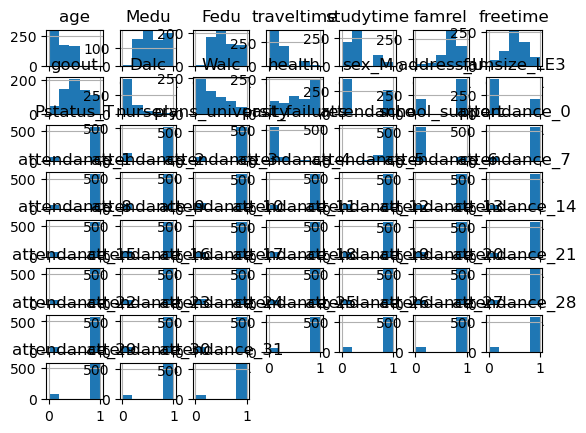

In [11]:
data.hist(bins=5)
data.describe()

In [12]:
# Из этих данных, данных предыдущих окон и того, что, количество ошибок совпало, видно,
# что кроме того, что я исправил в первой задаче, нечего исправлять.

__(1.5 балла)__

Другой простой способ найти выбросы &mdash; сделать предсказаниепосчитать ошибку на каждом объекте по отдельности и посмотреть на объекты с наибольшей ошибкой. Обратите внимание, что просто удалять все объекты с высокой ошибкой нельзя &mdash; это, конечно, хороший способ добиться меньшей ошибки (на данной выборке), но одновременно вы ухудшите обобщающую способность алгоритма. Вместо этого вам нужно найти однозначно ошибочные записи и их исправить.

*Hint: возможно, все проблемы уже были найдены первым способом; для проверки &mdash; в сумме здесь нужно исправить 3 проблемы.*

Для поиска ошибки на одном отдельном обьекте придётся обучить линейную регрессию руками. Частичный пример, допишите код. Постройте гистограмму распределения ошибок

Mean squared error: 233.90


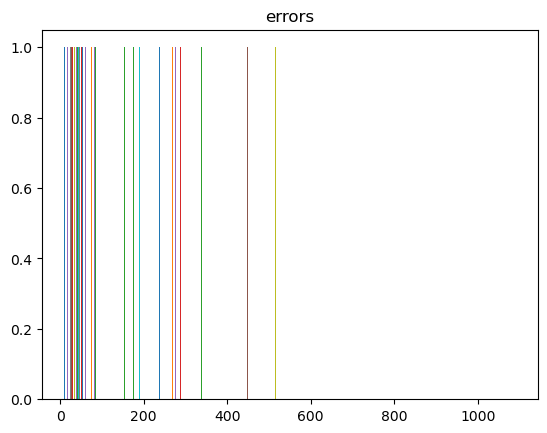

In [13]:
# Средние (ко 2 задаче) + количество посещений + min-max normalization.

import sklearn
from matplotlib import pyplot as plt 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

x_train, x_test, y_train, y_test = train_test_split(data.values[1:], answers.values, test_size=0.4, random_state=0)
regression = linear_model.LinearRegression().fit(x_train, y_train)

errors = []
prediction = regression.predict(x_test)
for i in range(len(x_test)):
    errors.append((y_test[i] - prediction[i]) ** 2)

print("Mean squared error: %.2f" % mean_squared_error(y_test, prediction))

plt.hist(errors, bins=[0,100,200,300,400,500,600,700,800,900,1000,1100]) 
plt.title("errors") 
plt.show()

Mean squared error: 233.90


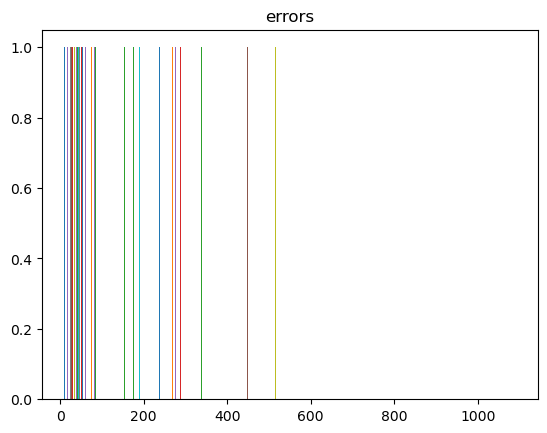

In [14]:
# Средние (ко 2 задаче) + количество посещений + mean normalization.

import sklearn
from matplotlib import pyplot as plt 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

x_train, x_test, y_train, y_test = train_test_split(data.values[1:], answers.values, test_size=0.4, random_state=0)
regression = linear_model.LinearRegression().fit(x_train, y_train)

errors = []
prediction = regression.predict(x_test)
for i in range(len(x_test)):
    errors.append((y_test[i] - prediction[i]) ** 2)

print("Mean squared error: %.2f" % mean_squared_error(y_test, prediction))

plt.hist(errors, bins=[0,100,200,300,400,500,600,700,800,900,1000,1100]) 
plt.title("errors") 
plt.show()

Mean squared error: 233.90


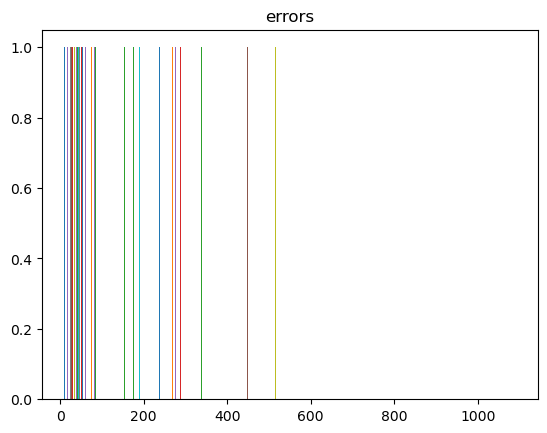

In [15]:
# Медиана (ко 2 задаче) + количество посещений + min-max normalization.

import sklearn
from matplotlib import pyplot as plt 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

x_train, x_test, y_train, y_test = train_test_split(data.values[1:], answers.values, test_size=0.4, random_state=0)
regression = linear_model.LinearRegression().fit(x_train, y_train)

errors = []
prediction = regression.predict(x_test)
for i in range(len(x_test)):
    errors.append((y_test[i] - prediction[i]) ** 2)

print("Mean squared error: %.2f" % mean_squared_error(y_test, prediction))

plt.hist(errors, bins=[0,100,200,300,400,500,600,700,800,900,1000,1100]) 
plt.title("errors") 
plt.show()

Mean squared error: 233.90


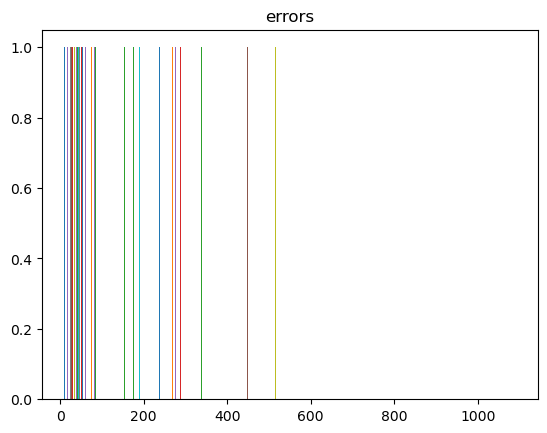

In [16]:
# Средние (ко 2 задаче) + все дни посещений отдельно + min-max normalization.

import sklearn
from matplotlib import pyplot as plt 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

x_train, x_test, y_train, y_test = train_test_split(data.values[1:], answers.values, test_size=0.4, random_state=0)
regression = linear_model.LinearRegression().fit(x_train, y_train)

errors = []
prediction = regression.predict(x_test)
for i in range(len(x_test)):
    errors.append((y_test[i] - prediction[i]) ** 2)

print("Mean squared error: %.2f" % mean_squared_error(y_test, prediction))

plt.hist(errors, bins=[0,100,200,300,400,500,600,700,800,900,1000,1100]) 
plt.title("errors") 
plt.show()

Mean squared error: 233.90


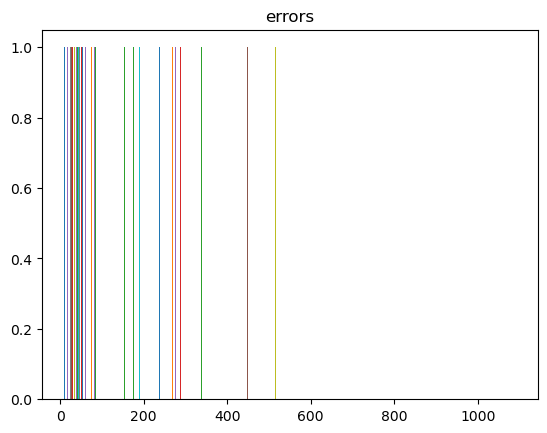

In [17]:
# Медиана (ко 2 задаче) + все дни посещений отдельно + min-max normalization.

import sklearn
from matplotlib import pyplot as plt 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

x_train, x_test, y_train, y_test = train_test_split(data.values[1:], answers.values, test_size=0.4, random_state=0)
regression = linear_model.LinearRegression().fit(x_train, y_train)

errors = []
prediction = regression.predict(x_test)
for i in range(len(x_test)):
    errors.append((y_test[i] - prediction[i]) ** 2)

print("Mean squared error: %.2f" % mean_squared_error(y_test, prediction))

plt.hist(errors, bins=[0,100,200,300,400,500,600,700,800,900,1000,1100]) 
plt.title("errors") 
plt.show()

Mean squared error: 340.18


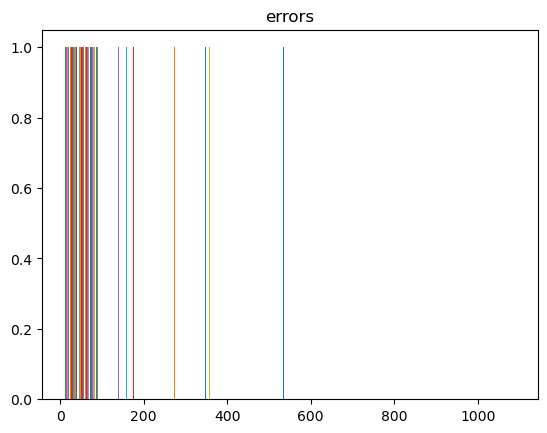

In [18]:
# Средние (ко 2 задаче) + количество посещений + min-max normalization + random + определенный диапазон.

import sklearn
from matplotlib import pyplot as plt 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

x_train, x_test, y_train, y_test = train_test_split(data.values[1:,:], answers.values, test_size=0.1)
regression = linear_model.LinearRegression().fit(x_train, y_train)

errors = []
prediction = regression.predict(x_test)
for i in range(len(x_test)):
    errors.append((y_test[i] - prediction[i]) ** 2)

print("Mean squared error: %.2f" % mean_squared_error(y_test, prediction))

plt.hist(errors, bins=[0,100,200,300,400,500,600,700,800,900,1000,1100]) 
plt.title("errors") 
plt.show()

### Финальное предсказание и отчёт

Проведите предсказание еще раз и сравните качество с исходным. Запишите свои наблюдения - как изменялось качество обучения модели при использовании разных модификаций данных. 

**Я провёл несколько запусков, данные некоторых из них в 6 задаче.
Замена NaN на медианные или средние значения почти ничего не меняет.
Изменение способа нормализации тоже почти ничего не меняет.
Запоминание количества посещений вместо параметра о посещении на каждый день улучшает предсказания.
Использование random и подбор разных диапазонов, при удачном их подборе, позволяет получить более точные результаты.
Минимальная среднеквадратичная ошибка, которую я смог получить это 88.67 (в последней гистограмме). Это около 10% погрешности, не так уж и плохо.**

In [19]:
Спасибо за помощь Ивану Осокину и Антону Ныйкину, они очень сильно помогли!!!

SyntaxError: invalid syntax (2252787784.py, line 1)